# **HOMEWORK 4**
---

**Goal:** Build a multilayer perceptron (MLP) model & for classifying SVHN dataset.

**Dataset:** SVHN, 32x32 RGB number images.        
http://ufldl.stanford.edu/housenumbers/

---

###**Instructions**             
**1)** **Preprocessing**  
> **1.1)** Load the dataset                 
> **1.2)** Normalize features                
  **1.3)** Visualize dataset

**2)** **Modelling**
> **2.1)** Try different fully hyperparameters (# of hidden layers, learning rate, # of epochs, # of neurons, add dropout, etc.)             
> **2.2)** Train with early stopping

**3)** **Report**                   
Share your results, which hyperparameters you used, train & test accuracy, etc. 
Write an at most 1/2-page summary of your approach to this problem at the end of your notebook; this should be like an executive summary. Include problem definition and preprocessing as well.


> **Topics to Discuss:**                                      
Explain you results.           
How did you choose the best hyperparameters?                         
What happened when the # of epochs are too large/small, why?                  
What happened when the learning rate is too large/small, why?              
What did you observe when you change the # of hidden layers?                
What did you observe when you change the # of neurons?   
What is the use of adding dropout?                     
What is the use of early stopping? 


---


**Note:** Don't forget to change Colab's runtime to GPU.







#1) Preprocessing
Load, normalize and visualize data


---





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

%matplotlib inline

In [7]:
# Load SVHN dataset

def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('./drive/My Drive/svhn_dataset/train_32x32.mat')
X_test, y_test = load_data('./drive/My Drive/svhn_dataset/test_32x32.mat')


# Summarize dataset (count, shape, min/max value)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_train max: {X_train.max()}")
print(f"X_train min: {X_train.min()}")
print(f"y_train unique values: {list(np.unique(y_train))}")

X_train shape: (32, 32, 3, 73257)
y_train shape: (73257, 1)
X_test shape: (32, 32, 3, 26032)
y_test shape: (26032, 1)
X_train max: 255
X_train min: 0
y_train unique values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Change input shape

X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)

In [ ]:
# Normalize the dataset

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Since '0' has label 10, changing 10s to 0s

y_train = np.where(y_train==10, 0, y_train)
y_test = np.where(y_test==10, 0, y_test)

In [ ]:
# One-hot encoding labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

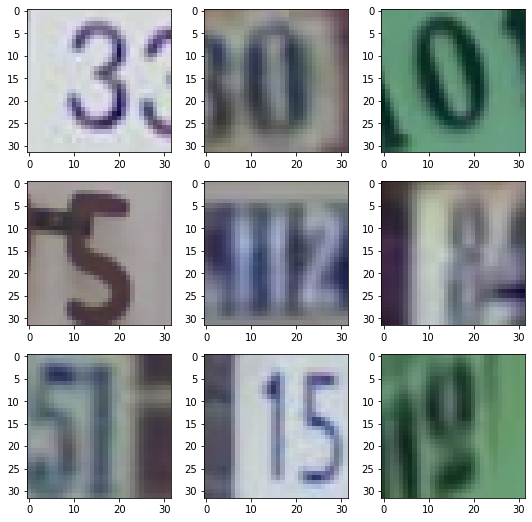

In [ ]:
# Visualize some samples

from random import randint

fig, axes = plt.subplots(3,3, figsize=(9,9))

for i in range(3):
  for j in range(3):
    axes[i][j].imshow(X_train[randint(0,73256)])

#2) Modelling
(Build, compile, fit, evaluate)


---



##2.1) Part 1

---



In [ ]:
# Importing required modules

import keras
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Flatten, Dropout

### Model 1


`learning_rate: 0.1`

`epoch: 50`

`# of hidden layers: 2`

`# of neurons: 512, 128`

In [ ]:
# Build the model

model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu', name='hidden_layer1'))
model.add(Dense(128, activation='relu', name='hidden_layer2'))
model.add(Dense(10, activation='softmax', name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile & fit the model 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split = 0.2)

# Hint: You can assign batch sizes 128, 256

Epoch 1/50
229/229 [==============================] - 3s 10ms/step - loss: 237.1289 - accuracy: 0.1561 - val_loss: 2.2376 - val_accuracy: 0.1875
Epoch 2/50
229/229 [==============================] - 2s 8ms/step - loss: 2.2391 - accuracy: 0.1894 - val_loss: 2.2399 - val_accuracy: 0.1875
Epoch 3/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2386 - accuracy: 0.1894 - val_loss: 2.2389 - val_accuracy: 0.1875
Epoch 4/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2384 - accuracy: 0.1868 - val_loss: 2.2401 - val_accuracy: 0.1875
Epoch 5/50
229/229 [==============================] - 2s 8ms/step - loss: 2.2382 - accuracy: 0.1893 - val_loss: 2.2413 - val_accuracy: 0.1875
Epoch 6/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2424 - accuracy: 0.1846 - val_loss: 2.2391 - val_accuracy: 0.1875
Epoch 7/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2388 - accuracy: 0.1919 - val_loss: 2.2444 - val_accuracy: 0.1875
Epo

In [ ]:
# Evaluate the model on test data

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 2s 3ms/step - loss: 2.2242 - accuracy: 0.1959
Test loss: 2.2242040634155273
Test accuracy: 0.19587430357933044


In [ ]:
# Try different hyperparameters and observe the results

### Model 2
Comparing performance according to <font color=red>`learning_rate`</font> with *Model 1*

`learning_rate: 0.00001` changed from <font color=red>`0.1`</font>

`epoch: 50`

`# of hidden layers: 2`

`# of neurons: 512, 128`

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu', name='hidden_layer1'))
model.add(Dense(128, activation='relu', name='hidden_layer2'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split = 0.2)

Epoch 1/50
229/229 [==============================] - 2s 9ms/step - loss: 2.2708 - accuracy: 0.1757 - val_loss: 2.2064 - val_accuracy: 0.2103
Epoch 2/50
229/229 [==============================] - 2s 8ms/step - loss: 2.1960 - accuracy: 0.2184 - val_loss: 2.1642 - val_accuracy: 0.2413
Epoch 3/50
229/229 [==============================] - 2s 7ms/step - loss: 2.1486 - accuracy: 0.2478 - val_loss: 2.1118 - val_accuracy: 0.2717
Epoch 4/50
229/229 [==============================] - 2s 7ms/step - loss: 2.0912 - accuracy: 0.2850 - val_loss: 2.0570 - val_accuracy: 0.3130
Epoch 5/50
229/229 [==============================] - 2s 7ms/step - loss: 2.0322 - accuracy: 0.3182 - val_loss: 1.9998 - val_accuracy: 0.3391
Epoch 6/50
229/229 [==============================] - 2s 8ms/step - loss: 1.9751 - accuracy: 0.3532 - val_loss: 1.9386 - val_accuracy: 0.3819
Epoch 7/50
229/229 [==============================] - 2s 8ms/step - loss: 1.9149 - accuracy: 0.3851 - val_loss: 1.8825 - val_accuracy: 0.3934
Epoch 

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 2s 3ms/step - loss: 1.0896 - accuracy: 0.6794
Test loss: 1.0896114110946655
Test accuracy: 0.6793946027755737


### Model 3

Comparing performance according to <font color=red>`epoch`</font> with *Model 2*

`learning_rate: 0.00001`

`epoch: 100` changed from <font color=red>`50`</font>

`# of hidden layers: 2`

`# of neurons: 512, 128`

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu', name='hidden_layer1'))
model.add(Dense(128, activation='relu', name='hidden_layer2'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=100, validation_split = 0.2)

Epoch 1/100
229/229 [==============================] - 2s 9ms/step - loss: 2.2498 - accuracy: 0.1879 - val_loss: 2.2049 - val_accuracy: 0.2030
Epoch 2/100
229/229 [==============================] - 2s 7ms/step - loss: 2.1933 - accuracy: 0.2141 - val_loss: 2.1633 - val_accuracy: 0.2372
Epoch 3/100
229/229 [==============================] - 2s 8ms/step - loss: 2.1504 - accuracy: 0.2437 - val_loss: 2.1113 - val_accuracy: 0.2566
Epoch 4/100
229/229 [==============================] - 2s 7ms/step - loss: 2.0944 - accuracy: 0.2774 - val_loss: 2.0523 - val_accuracy: 0.3130
Epoch 5/100
229/229 [==============================] - 2s 7ms/step - loss: 2.0318 - accuracy: 0.3272 - val_loss: 1.9944 - val_accuracy: 0.3542
Epoch 6/100
229/229 [==============================] - 2s 7ms/step - loss: 1.9646 - accuracy: 0.3596 - val_loss: 1.9288 - val_accuracy: 0.3813
Epoch 7/100
229/229 [==============================] - 2s 7ms/step - loss: 1.8997 - accuracy: 0.3976 - val_loss: 1.8616 - val_accuracy: 0.4192

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 2s 3ms/step - loss: 0.9116 - accuracy: 0.7339
Test loss: 0.9115703105926514
Test accuracy: 0.7339044213294983


### Model 4

Comparing performance according to <font color = red>`epoch`</font> with *Model 2* and *Model 3*

`learning_rate: 0.00001`

`epoch: 200` changed from <font color=red>`50 and 100`</font>

`# of hidden layers: 2`

`# of neurons: 512, 128`

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu', name='hidden_layer1'))
model.add(Dense(128, activation='relu', name='hidden_layer2'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=200, validation_split = 0.2)

Epoch 1/200
229/229 [==============================] - 2s 9ms/step - loss: 2.2632 - accuracy: 0.1797 - val_loss: 2.1946 - val_accuracy: 0.2072
Epoch 2/200
229/229 [==============================] - 2s 7ms/step - loss: 2.1832 - accuracy: 0.2267 - val_loss: 2.1456 - val_accuracy: 0.2421
Epoch 3/200
229/229 [==============================] - 2s 7ms/step - loss: 2.1293 - accuracy: 0.2516 - val_loss: 2.0892 - val_accuracy: 0.2775
Epoch 4/200
229/229 [==============================] - 2s 7ms/step - loss: 2.0736 - accuracy: 0.2907 - val_loss: 2.0304 - val_accuracy: 0.3160
Epoch 5/200
229/229 [==============================] - 2s 7ms/step - loss: 2.0103 - accuracy: 0.3270 - val_loss: 1.9678 - val_accuracy: 0.3603
Epoch 6/200
229/229 [==============================] - 2s 7ms/step - loss: 1.9469 - accuracy: 0.3646 - val_loss: 1.9136 - val_accuracy: 0.3815
Epoch 7/200
229/229 [==============================] - 2s 7ms/step - loss: 1.8843 - accuracy: 0.3999 - val_loss: 1.8492 - val_accuracy: 0.4141

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 2s 3ms/step - loss: 0.7439 - accuracy: 0.7906
Test loss: 0.7439432144165039
Test accuracy: 0.7906038761138916


### Model 5

Comparing performance according to <font color = red>`# of hidden layers`</font> with *Model 2*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 3` changed from <font color=red>`2`</font>

`# of neurons: 1024, 512, 128`

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(1024, activation='relu', name='hidden_layer1')) # new layer
model.add(Dense(512, activation='relu', name='hidden_layer2'))
model.add(Dense(128, activation='relu', name='hidden_layer3'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split = 0.2)

Epoch 1/50
229/229 [==============================] - 3s 12ms/step - loss: 2.2439 - accuracy: 0.1818 - val_loss: 2.1676 - val_accuracy: 0.2608
Epoch 2/50
229/229 [==============================] - 2s 9ms/step - loss: 2.1387 - accuracy: 0.2482 - val_loss: 2.0553 - val_accuracy: 0.3267
Epoch 3/50
229/229 [==============================] - 2s 9ms/step - loss: 2.0149 - accuracy: 0.3324 - val_loss: 1.9158 - val_accuracy: 0.3894
Epoch 4/50
229/229 [==============================] - 2s 9ms/step - loss: 1.8685 - accuracy: 0.3984 - val_loss: 1.7858 - val_accuracy: 0.4240
Epoch 5/50
229/229 [==============================] - 2s 9ms/step - loss: 1.7426 - accuracy: 0.4562 - val_loss: 1.6652 - val_accuracy: 0.4964
Epoch 6/50
229/229 [==============================] - 2s 9ms/step - loss: 1.6258 - accuracy: 0.5035 - val_loss: 1.5696 - val_accuracy: 0.5254
Epoch 7/50
229/229 [==============================] - 2s 9ms/step - loss: 1.5341 - accuracy: 0.5371 - val_loss: 1.4954 - val_accuracy: 0.5621
Epoch

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 3s 3ms/step - loss: 0.9222 - accuracy: 0.7273
Test loss: 0.9221834540367126
Test accuracy: 0.7272971868515015


### Model 6

Comparing performance according to <font color=red>`# of hidden layers`</font> with *Model 2* and *Model 5*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 1` changed from <font color=red>`2 and 3`</font>

`# of neurons: 512`

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu', name='hidden_layer1')) # the only hidden layer
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
output_layer (Dense)         (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split = 0.2)

Epoch 1/50
229/229 [==============================] - 2s 9ms/step - loss: 2.2769 - accuracy: 0.1744 - val_loss: 2.2170 - val_accuracy: 0.1987
Epoch 2/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2124 - accuracy: 0.2030 - val_loss: 2.1867 - val_accuracy: 0.2083
Epoch 3/50
229/229 [==============================] - 2s 7ms/step - loss: 2.1805 - accuracy: 0.2191 - val_loss: 2.1597 - val_accuracy: 0.2110
Epoch 4/50
229/229 [==============================] - 2s 7ms/step - loss: 2.1460 - accuracy: 0.2398 - val_loss: 2.1246 - val_accuracy: 0.2303
Epoch 5/50
229/229 [==============================] - 2s 7ms/step - loss: 2.1168 - accuracy: 0.2584 - val_loss: 2.0902 - val_accuracy: 0.2766
Epoch 6/50
229/229 [==============================] - 2s 7ms/step - loss: 2.0781 - accuracy: 0.2827 - val_loss: 2.0555 - val_accuracy: 0.3093
Epoch 7/50
229/229 [==============================] - 2s 7ms/step - loss: 2.0333 - accuracy: 0.3131 - val_loss: 2.0147 - val_accuracy: 0.3372
Epoch 

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 2s 3ms/step - loss: 1.2333 - accuracy: 0.6485
Test loss: 1.233284831047058
Test accuracy: 0.6484711170196533


### Model 7

Comparing performance according to <font color=red>`# of neurons`</font> with *Model 5*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 3`

`# of neurons: 256, 64, 16` changed from <font color=red>`1024, 512, 128`</font>

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(256, activation='relu', name='hidden_layer1'))
model.add(Dense(64, activation='relu', name='hidden_layer2'))
model.add(Dense(16, activation='relu', name='hidden_layer3'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                16448     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 16)                1040      
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 804,346
Trainable params: 804,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split = 0.2)

Epoch 1/50
229/229 [==============================] - 2s 8ms/step - loss: 2.2890 - accuracy: 0.1045 - val_loss: 2.2679 - val_accuracy: 0.1849
Epoch 2/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2620 - accuracy: 0.1920 - val_loss: 2.2514 - val_accuracy: 0.2068
Epoch 3/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2400 - accuracy: 0.2113 - val_loss: 2.2259 - val_accuracy: 0.2329
Epoch 4/50
229/229 [==============================] - 2s 7ms/step - loss: 2.2180 - accuracy: 0.2370 - val_loss: 2.2001 - val_accuracy: 0.2637
Epoch 5/50
229/229 [==============================] - 2s 7ms/step - loss: 2.1918 - accuracy: 0.2708 - val_loss: 2.1747 - val_accuracy: 0.2838
Epoch 6/50
229/229 [==============================] - 2s 7ms/step - loss: 2.1631 - accuracy: 0.2897 - val_loss: 2.1475 - val_accuracy: 0.2999
Epoch 7/50
229/229 [==============================] - 2s 7ms/step - loss: 2.1348 - accuracy: 0.3073 - val_loss: 2.1225 - val_accuracy: 0.3164
Epoch 

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 2s 3ms/step - loss: 1.4396 - accuracy: 0.5524
Test loss: 1.4396333694458008
Test accuracy: 0.5524354577064514


### Model 8

Comparing performance according to <font color=red>`# of neurons`</font> with *Model 5 and Model 7*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 3`

`# of neurons: 512, 128, 64` changed from <font color=red>`1024, 512, 128 and 256, 64, 16`</font>

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(512, activation='relu', name='hidden_layer1'))
model.add(Dense(128, activation='relu', name='hidden_layer2'))
model.add(Dense(64, activation='relu', name='hidden_layer3'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 1,647,946
Trainable params: 1,647,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split = 0.2)

Epoch 1/50
229/229 [==============================] - 3s 9ms/step - loss: 2.2529 - accuracy: 0.1776 - val_loss: 2.2151 - val_accuracy: 0.2039
Epoch 2/50
229/229 [==============================] - 2s 8ms/step - loss: 2.2099 - accuracy: 0.2023 - val_loss: 2.1858 - val_accuracy: 0.2230
Epoch 3/50
229/229 [==============================] - 2s 8ms/step - loss: 2.1710 - accuracy: 0.2289 - val_loss: 2.1440 - val_accuracy: 0.2388
Epoch 4/50
229/229 [==============================] - 2s 8ms/step - loss: 2.1282 - accuracy: 0.2541 - val_loss: 2.0967 - val_accuracy: 0.2738
Epoch 5/50
229/229 [==============================] - 2s 8ms/step - loss: 2.0785 - accuracy: 0.2866 - val_loss: 2.0413 - val_accuracy: 0.3329
Epoch 6/50
229/229 [==============================] - 2s 8ms/step - loss: 2.0218 - accuracy: 0.3225 - val_loss: 1.9810 - val_accuracy: 0.3507
Epoch 7/50
229/229 [==============================] - 2s 8ms/step - loss: 1.9499 - accuracy: 0.3639 - val_loss: 1.9126 - val_accuracy: 0.3711
Epoch 

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 3s 3ms/step - loss: 1.0963 - accuracy: 0.6773
Test loss: 1.0963495969772339
Test accuracy: 0.6773202419281006


###Model 9

Trying to guess best performing hyperparameters from previous comparions without paying attention to time and GPU power/RAM used.

`learning_rate: 0.00001`

`epoch: 200`

`# of hidden layers: 3`

`# of neurons: 1024, 512, 128`

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(1024, activation='relu', name='hidden_layer1'))
model.add(Dense(512, activation='relu', name='hidden_layer2'))
model.add(Dense(128, activation='relu', name='hidden_layer3'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=200, validation_split = 0.2)

Epoch 1/200
229/229 [==============================] - 3s 11ms/step - loss: 2.2419 - accuracy: 0.1852 - val_loss: 2.1740 - val_accuracy: 0.2469
Epoch 2/200
229/229 [==============================] - 2s 9ms/step - loss: 2.1474 - accuracy: 0.2511 - val_loss: 2.0694 - val_accuracy: 0.3003
Epoch 3/200
229/229 [==============================] - 2s 9ms/step - loss: 2.0315 - accuracy: 0.3150 - val_loss: 1.9555 - val_accuracy: 0.3320
Epoch 4/200
229/229 [==============================] - 2s 9ms/step - loss: 1.9162 - accuracy: 0.3745 - val_loss: 1.8285 - val_accuracy: 0.4132
Epoch 5/200
229/229 [==============================] - 2s 9ms/step - loss: 1.7852 - accuracy: 0.4431 - val_loss: 1.7170 - val_accuracy: 0.4799
Epoch 6/200
229/229 [==============================] - 2s 9ms/step - loss: 1.6691 - accuracy: 0.4924 - val_loss: 1.6121 - val_accuracy: 0.5337
Epoch 7/200
229/229 [==============================] - 2s 9ms/step - loss: 1.5763 - accuracy: 0.5357 - val_loss: 1.5298 - val_accuracy: 0.562

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 3s 3ms/step - loss: 0.6633 - accuracy: 0.8171
Test loss: 0.6632614731788635
Test accuracy: 0.8170713186264038





---


**Dropout** : [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) is a regularization approach. At each training stage, specified percent of individual nodes are dropped out of the network.

[Read](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/) MLP Dropout Regularization for further information

![picture](https://drive.google.com/uc?id=12lv5VsPFLt6sKEZvgQRyQ7mHeW4l-Vq9)

In [ ]:
#Try adding dropout to the architecture 

### Model 10 (**Dropout**)

Comparing performance according to <font color = red>`regularization (dropout)`</font> with *Model 3*

`learning_rate: 0.00001`

`epoch: 100`

`# of hidden layers: 3`

`# of neurons: 1024, 512, 128`

<font color=red>**WITH DROPOUT**</font>

In [ ]:
del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(1024, activation='relu', name='hidden_layer1'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', name='hidden_layer2'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', name='hidden_layer3'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_split = 0.2)

Epoch 1/50
229/229 [==============================] - 3s 11ms/step - loss: 2.3187 - accuracy: 0.1524 - val_loss: 2.2351 - val_accuracy: 0.1913
Epoch 2/50
229/229 [==============================] - 2s 9ms/step - loss: 2.2485 - accuracy: 0.1850 - val_loss: 2.2137 - val_accuracy: 0.1900
Epoch 3/50
229/229 [==============================] - 2s 9ms/step - loss: 2.2262 - accuracy: 0.1950 - val_loss: 2.1818 - val_accuracy: 0.1959
Epoch 4/50
229/229 [==============================] - 2s 9ms/step - loss: 2.1926 - accuracy: 0.2102 - val_loss: 2.1343 - val_accuracy: 0.2331
Epoch 5/50
229/229 [==============================] - 2s 9ms/step - loss: 2.1529 - accuracy: 0.2278 - val_loss: 2.0718 - val_accuracy: 0.2791
Epoch 6/50
229/229 [==============================] - 2s 9ms/step - loss: 2.0986 - accuracy: 0.2585 - val_loss: 2.0013 - val_accuracy: 0.3324
Epoch 7/50
229/229 [==============================] - 2s 9ms/step - loss: 2.0421 - accuracy: 0.2937 - val_loss: 1.9247 - val_accuracy: 0.3706
Epoch

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 3s 3ms/step - loss: 0.9574 - accuracy: 0.7154
Test loss: 0.9573673009872437
Test accuracy: 0.715350329875946


##2.2) Part 2


---



When training a model, model stops generalizing after a while and learns noices of the datapoints as well. One way to avoid this **overfitting** is to use **early stopping**. With early stopping, model performance is monitored on validation data in each epoch and stops updating weights when validation performance starts decreasing.

https://keras.io/api/callbacks/early_stopping/

![picture](https://drive.google.com/uc?id=1Rs8FkpVgifspzvlIfdTDYyBVjR01OgVj)

### Model 11 (**Early Stopping**)

Entering extreme values to observe overfitting and see (hopefully) early stopping. For some reason my previous models seemed to underfit.

`learning_rate: 0.00001`

`epoch: 300`

`# of hidden layers: 3`

`# of neurons: 1024, 512, 512`

<font color=red>**WITH EARLY STOPPING**</font>

In [ ]:
# Build & compile the model

del model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))
model.add(Dense(1024, activation='relu', name='hidden_layer1'))
model.add(Dense(512, activation='relu', name='hidden_layer2'))
model.add(Dense(512, activation='relu', name='hidden_layer3'))
model.add(Dense(10, activation='softmax', name='output_layer'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               262656    
_________________________________________________________________
output_layer (Dense)         (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Aim is to stop when minimum validation loss is achieved
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, \
                    verbose=1, mode='min',restore_best_weights=True) # Training will stop when minimum validation loss is achieved

model.fit(X_train, y_train, batch_size=256 ,
                              epochs=300, validation_split = 0.2, # you can have large epoch size since it will stop when best validation loss is achieved
                              callbacks=[es], verbose=1)

Epoch 1/300
229/229 [==============================] - 3s 11ms/step - loss: 2.2665 - accuracy: 0.1759 - val_loss: 2.1792 - val_accuracy: 0.1978
Epoch 2/300
229/229 [==============================] - 2s 9ms/step - loss: 2.1540 - accuracy: 0.2298 - val_loss: 2.0693 - val_accuracy: 0.3041
Epoch 3/300
229/229 [==============================] - 2s 9ms/step - loss: 2.0220 - accuracy: 0.3202 - val_loss: 1.9076 - val_accuracy: 0.3759
Epoch 4/300
229/229 [==============================] - 2s 9ms/step - loss: 1.8581 - accuracy: 0.4032 - val_loss: 1.7482 - val_accuracy: 0.4384
Epoch 5/300
229/229 [==============================] - 2s 9ms/step - loss: 1.6899 - accuracy: 0.4740 - val_loss: 1.6073 - val_accuracy: 0.5013
Epoch 6/300
229/229 [==============================] - 2s 9ms/step - loss: 1.5567 - accuracy: 0.5280 - val_loss: 1.4981 - val_accuracy: 0.5495
Epoch 7/300
229/229 [==============================] - 2s 9ms/step - loss: 1.4501 - accuracy: 0.5669 - val_loss: 1.4100 - val_accuracy: 0.585

![picture](https://drive.google.com/uc?id=1Mp2W2VVQVmyuleSDNDKJLI6hxAtyG5gx)

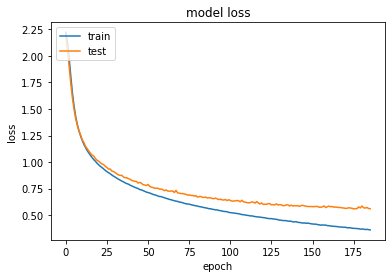

In [ ]:
#Plot train & validation loss

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluate on test data

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

814/814 [==============================] - 3s 3ms/step - loss: 0.6639 - accuracy: 0.8223
Test loss: 0.6639110445976257
Test accuracy: 0.8223340511322021


#3) Report


---

Summary of models you try (learning rate, # of hidden layers, # of epochs, test accuracy, etc.) Write a short report & discuss the results of the models you trained

##Summary of the Models

---

**Model 1**

`learning_rate: 0.1`

`epoch: 50`

`# of hidden layers: 2`

`# of neurons: 512, 128`

<font color=blue>Test accuracy: 0.19587430357933044</font>

---

**Model 2**

Comparing performance according to <font color=red>`learning_rate`</font> with *Model 1*

`learning_rate: 0.00001` changed from <font color=red>`0.1`</font>

`epoch: 50`

`# of hidden layers: 2`

`# of neurons: 512, 128`

<font color=blue>Test accuracy: 0.6793946027755737</font>

---
**Model 3**

Comparing performance according to <font color=red>`epoch`</font> with *Model 2*

`learning_rate: 0.00001`

`epoch: 100` changed from <font color=red>`50`</font>

`# of hidden layers: 2`

`# of neurons: 512, 128`

<font color=blue>Test accuracy: 0.7339044213294983</font>

---

**Model 4**

Comparing performance according to <font color = red>`epoch`</font> with *Model 2* and *Model 3*

`learning_rate: 0.00001`

`epoch: 200` changed from <font color=red>`50 and 100`</font>

`# of hidden layers: 2`

`# of neurons: 512, 128`

<font color=blue>Test accuracy: 0.7906038761138916</font>

---

**Model 5**

Comparing performance according to <font color = red>`# of hidden layers`</font> with *Model 2*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 3` changed from <font color=red>`2`</font>

`# of neurons: 1024, 512, 128`

<font color=blue>Test accuracy: 0.7272971868515015</font>

---

**Model 6**

Comparing performance according to <font color=red>`# of hidden layers`</font> with *Model 2* and *Model 5*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 1` changed from <font color=red>`2 and 3`</font>

`# of neurons: 512`

<font color=blue>Test accuracy: 0.6484711170196533</font>

---

**Model 7**

Comparing performance according to <font color=red>`# of neurons`</font> with *Model 5*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 3`

`# of neurons: 256, 64, 16` changed from <font color=red>`1024, 512, 128`</font>

<font color=blue>Test accuracy: 0.5524354577064514</font>

---

**Model 8**

Comparing performance according to <font color=red>`# of neurons`</font> with *Model 5 and Model 7*

`learning_rate: 0.00001`

`epoch: 50`

`# of hidden layers: 3`

`# of neurons: 512, 128, 64` changed from <font color=red>`1024, 512, 128 and 256, 64, 16`</font>

<font color=blue>Test accuracy: 0.6773202419281006</font>

---

**Model 9**

Trying to guess best performing hyperparameters from previous comparions without paying attention to time and GPU power/RAM used.

`learning_rate: 0.00001`

`epoch: 200`

`# of hidden layers: 3`

`# of neurons: 1024, 512, 128`

<font color=blue>Test accuracy: 0.8170713186264038</font>

---

**Model 10 (**Dropout**)**

Comparing performance according to <font color = red>`regularization (dropout)`</font> with *Model 3*

`learning_rate: 0.00001`

`epoch: 100`

`# of hidden layers: 3`

`# of neurons: 1024, 512, 128`

<font color=red>**WITH DROPOUT**</font>

<font color=blue>Test accuracy: 0.715350329875946</font>

---

**Model 11 (**Early Stopping**)**

Entering extreme values to observe overfitting and see (hopefully) early stopping. For some reason my previous models seemed to underfit.

`learning_rate: 0.00001`

`epoch: 300`

`# of hidden layers: 3`

`# of neurons: 1024, 512, 512`

<font color=red>**WITH EARLY STOPPING**</font>

<font color=blue>Test accuracy: 0.8223340511322021</font>

---

**Problem Definition**

> In this homework, our task was to train multilayer perceptron models for classifying SVHN dataset and understand how certain hyperparameters affect the test accuracy score, and what can be done to combat overfitting.

**Preprocessing**

> For preprocessing, after loading the train and test sets; changed the input shapes, normalized the X_train and X_test, replaced '10's in y_train and y_test with '0's, and one-hot encoded the labels as setting `loss='categorical_crossentropy'` meant that I needed one-hot encoded labels.

**How did you choose the best hyperparameters?**
> I chose the "best" hyperparameters according to the validation accuracy score without paying much attention to the time it takes to train the model and GPU power/RAM, and storage used as my models. Most of my models seemed to underfit (even the slightest increase in model complexity improved test accuracy scores) with the given hyperparameters in the document. However, one must also pay attention to to the time it takes to train the model and GPU power/RAM, and storage used.

**What happened when the # of epochs are too large/small, why?**
> As seen from Model 2, Model 3 and Model 4, as `# of epochs` increases, the validation and test accuracy seemed to increase. This was no surprise because more iterations through the training set means more learning is done, which (generally) leads to higher accuracy scores. Too small `# of epochs` will lead to underfitting and too large `# of epochs` will lead to overfitting.

**What happened when the learning rate is too large/small, why?**
> As seen from Model 1 and Model 2, by setting `learning_rate` to 0.1, we got a extremely simple (and inaccurate) model with a test accuracy score of 0.19587430357933044. But when we set the `learning_rate` to 0.00001, test accuracy score increased by 240%. When the learning rate was very high (0.1), gradient descent failed to converge to local minima. Too large `learning_rate` will lead to underfitting and large loss.

**What did you observe when you change the # of hidden layers?**
> Increasing `# of hidden layers` meant increasing model complexity, which increased validation and test accuracy scores as seen by Model 2, Model 5 and Model 6. 

**What did you observe when you change the # of neurons?**
>  Increasing `# of neurons` meant increasing model complexity, which increased validation and test accuracy scores as seen by Model 5, Model 7 and Model 8. 

**What is the use of adding dropout?**
> It is a regularization approach used to prevent overfitting.

**What is the use of early stopping?**
> We use early stopping approach to prevent overfitting by stopping updating weights when validation accuracy score stops improving.
